In [1]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
print(tf.__version__)

2.12.0


## PART A

In [56]:
# Q1 A

In [57]:
signals = pd.read_csv('/content/gdrive/MyDrive/AIML/Part-+1%2C2%263+-+Signal.csv')
signals.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
signals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [59]:
# Q1 B 

In [60]:
signals.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [61]:

percent_missing = pd.DataFrame(signals.isna().mean().round(4)*100, columns=['Percentage of null values'])

In [62]:
percent_missing

,Percentage of null values
Parameter 1,0.0
Parameter 2,0.0
Parameter 3,0.0
Parameter 4,0.0
Parameter 5,0.0
Parameter 6,0.0
Parameter 7,0.0
Parameter 8,0.0
Parameter 9,0.0
Parameter 10,0.0


Data Analysis :-

In [63]:
signals.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [64]:
# Q1 C

In [65]:
signals.duplicated().sum()

240

In [66]:
signal = signals.drop_duplicates()
signal

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [67]:
print(signal.Signal_Strength.value_counts())

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64


In [68]:
# Q1 D

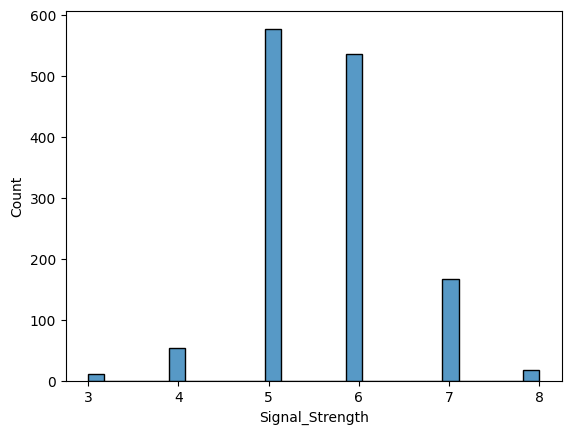

In [69]:
sns.histplot(data = signal, x = 'Signal_Strength');

In [70]:
# Q1 E

Insights :-

- There were no null (or) missing vlaues in the given dataset

- Number of duplicate values = 240

- Parameter 7 has maximum mean and standard deviation

    With regard to Signal_Strength:-

    . It has 6 unique values (3, 4, 5, 6, 7, 8) in which 5 has high frequency and 3 has least frequency

    . Frequency of signal_strength :- 5>6>7>4>8>3.



In [71]:
# Q2 A

In [72]:
X = signal.drop('Signal_Strength', axis = 1)
Y = signal['Signal_Strength']

In [73]:
# Q2 B 

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 22)

In [75]:
# Q2 C (Shape of variables)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


In [77]:
# Q2 D (Normalisation)

In [78]:
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [79]:
# Q2 E (Encoding)

In [80]:
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [81]:
print(y_train.shape)
print(y_test.shape)

(951, 9)
(408, 9)


In [82]:
print("First 5 training labels as one-hot encoded vectors :\n", y_train[:5])

First 5 training labels as one-hot encoded vectors :
 [[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [83]:
num_classes = 9

In [84]:
# Q3 A

In [85]:
model = Sequential()  
model.add(Dense(256, activation='relu',kernel_initializer='he_uniform')) 
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

In [86]:
adam = optimizers.Adam(learning_rate =1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [87]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [88]:
# Q3 B

In [89]:
history=model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/50

Epoch 1: saving model to model_weights.h5
6/6 - 2s - loss: 2.3716 - accuracy: 0.1829 - val_loss: 1.9818 - val_accuracy: 0.3298 - lr: 0.0010 - 2s/epoch - 255ms/step
Epoch 2/50

Epoch 2: saving model to model_weights.h5
6/6 - 0s - loss: 1.8269 - accuracy: 0.4092 - val_loss: 1.6573 - val_accuracy: 0.4084 - lr: 0.0010 - 76ms/epoch - 13ms/step
Epoch 3/50

Epoch 3: saving model to model_weights.h5
6/6 - 0s - loss: 1.5136 - accuracy: 0.5039 - val_loss: 1.3585 - val_accuracy: 0.5236 - lr: 0.0010 - 73ms/epoch - 12ms/step
Epoch 4/50

Epoch 4: saving model to model_weights.h5
6/6 - 0s - loss: 1.3026 - accuracy: 0.5711 - val_loss: 1.2123 - val_accuracy: 0.5445 - lr: 0.0010 - 85ms/epoch - 14ms/step
Epoch 5/50

Epoch 5: saving model to model_weights.h5
6/6 - 0s - loss: 1.1673 - accuracy: 0.5947 - val_loss: 1.1314 - val_accuracy: 0.5445 - lr: 0.0010 - 73ms/epoch - 12ms/step
Epoch 6/50

Epoch 6: saving model to model_weights.h5
6/6 - 0s - loss: 1.0853 - accuracy: 0.6039 - val_loss: 1.0940 

In [90]:
# Q3 C (Plots)

i. Training Loss and Validation Loss 

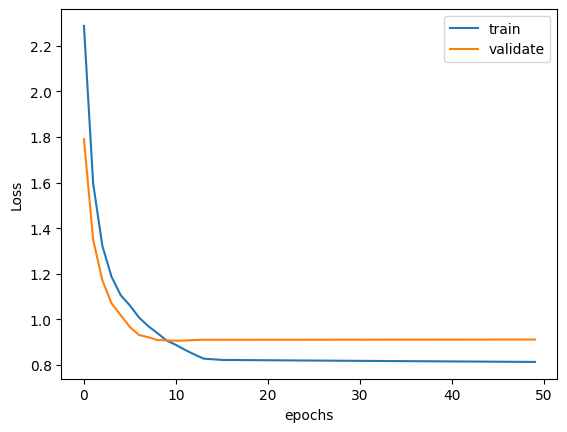

In [ ]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validate')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

ii. Training Accuracy and Validation Accuracy

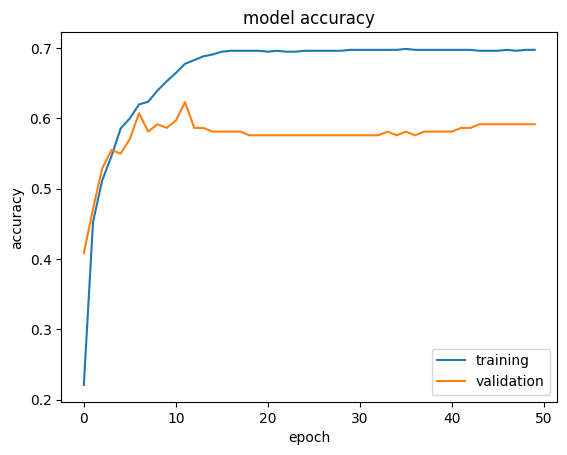

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [ ]:
# Q3 D (Designing new architecture)

Adding Dropout and batchnormalization to improve performance :-

In [91]:
model_1 = Sequential()  
model_1.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dropout(0.5))
model_1.add(BatchNormalization())
model_1.add(Dense(num_classes, activation='softmax'))

In [92]:
adam = optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) 

In [93]:
checkpoint = ModelCheckpoint("model_weights_1.h5",monitor='val_accuracy',
                            save_weights_only=True, model='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [94]:
history=model_1.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=128, verbose=2, callbacks=callbacks)

Epoch 1/50

Epoch 1: saving model to model_weights_1.h5
6/6 - 2s - loss: 2.6407 - accuracy: 0.1118 - val_loss: 2.3350 - val_accuracy: 0.0838 - lr: 0.0010 - 2s/epoch - 297ms/step
Epoch 2/50

Epoch 2: saving model to model_weights_1.h5
6/6 - 0s - loss: 2.4473 - accuracy: 0.1697 - val_loss: 2.1197 - val_accuracy: 0.2461 - lr: 0.0010 - 74ms/epoch - 12ms/step
Epoch 3/50

Epoch 3: saving model to model_weights_1.h5
6/6 - 0s - loss: 2.2571 - accuracy: 0.2237 - val_loss: 1.9748 - val_accuracy: 0.3298 - lr: 0.0010 - 79ms/epoch - 13ms/step
Epoch 4/50

Epoch 4: saving model to model_weights_1.h5
6/6 - 0s - loss: 2.1729 - accuracy: 0.2987 - val_loss: 1.8926 - val_accuracy: 0.3979 - lr: 0.0010 - 74ms/epoch - 12ms/step
Epoch 5/50

Epoch 5: saving model to model_weights_1.h5
6/6 - 0s - loss: 2.0354 - accuracy: 0.3684 - val_loss: 1.8261 - val_accuracy: 0.4346 - lr: 0.0010 - 77ms/epoch - 13ms/step
Epoch 6/50

Epoch 6: saving model to model_weights_1.h5
6/6 - 0s - loss: 1.9504 - accuracy: 0.3803 - val_l

In [ ]:
# Q3 E

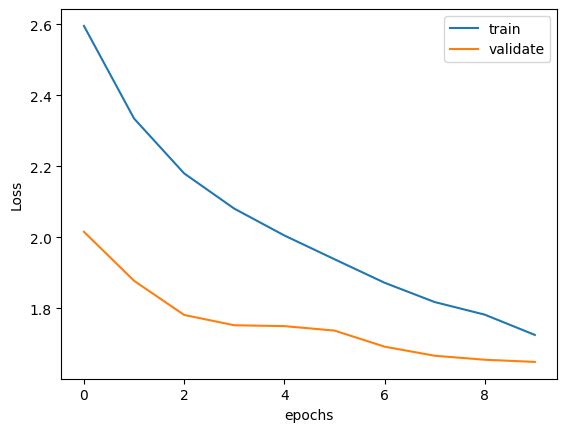

In [ ]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validate')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

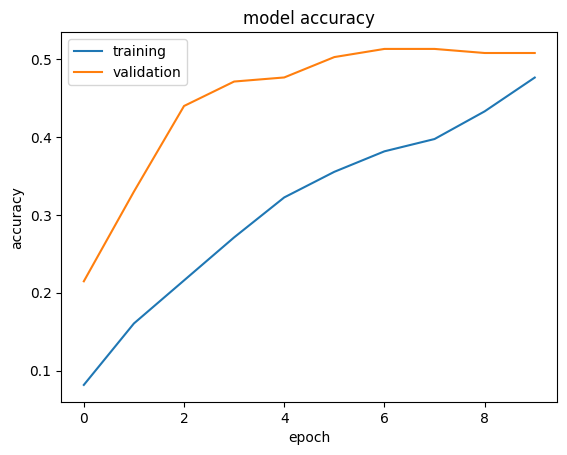

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Insights :-

-- Loss :- Initially there is sudden drop in training, validation loss and remained constant with increase in number of epochs.

-- Accuracy :- Trainig and validation accuracy curves are almost similar, initially there is Sudden raise in accuracy and once it reached maximum it remains constant with more training accuracy.

After doing batchnormalization and dropout :-

-- Decrease in loss

-- Increase in accuracy

    

    


# PART B

In [4]:
import h5py

In [96]:
# Q1 A 

In [97]:
h_file  = h5py.File('/content/gdrive/MyDrive/AIML/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [98]:
h_file

<HDF5 file "Autonomous_Vehicles_SVHN_single_grey1.h5" (mode r)>

In [99]:
# Q1 B

In [100]:
h_file.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [101]:
# Q1 C

In [102]:

# Train set

In [103]:
X_train = h_file['X_train'][:]
y_train = h_file['y_train'][:]

In [104]:
# Validation set

In [105]:
X_val = h_file['X_val'][:]
y_val = h_file['y_val'][:]

In [106]:
# Test set

In [107]:
X_test = h_file['X_test'][:]
y_test = h_file['y_test'][:]

In [108]:
# Q2 A

In [109]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 32, 32)
(18000, 32, 32)
(42000,)
(18000,)


In [110]:
# Q2 B (Visualising first 10 images and its corresponding labels)

Images with corresponding labels [2 6 7 4 4 0 3 0 7 3]


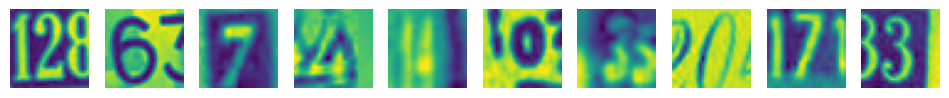

In [111]:
plt.figure(figsize=(12, 12))
labels = y_train[0:10]
for i in range(10):
  ax = plt.subplot(1, 10, i + 1)
  plt.imshow(X_train[i])
  plt.axis("off")
print('Images with corresponding labels', labels)

In [112]:

# Q2 C (Reshaping images)

In [113]:
image_vector_size = 32*32
image_vector_size

1024

In [114]:
# As both X_train and X_test have same last 2 dimensions we can reshape both of them to 1024

In [115]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [116]:
# Q2 D(Normalising pixel values)

In [117]:
X_train = X_train/255.0
X_test = X_test/255.0

In [118]:
# Shape after reshaping and normalising :-

In [119]:
print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


In [120]:
# Q2 E (Transforming labels)

In [121]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [122]:
# Q2 F

In [123]:
print("First 5 training labels as one-hot encoded vectors :\n", y_train[:5])

First 5 training labels as one-hot encoded vectors :
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [124]:
num_classes = 10

In [125]:
print('Total number of classes :', num_classes )

Total number of classes : 10


In [126]:
# Q3 A (Designing a neural network classifier to train )

In [127]:
model = Sequential()  
model.add(Dense(256, activation='relu',kernel_initializer='he_uniform')) 
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

In [128]:
adam = optimizers.Adam(learning_rate = 1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [129]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [130]:
# Q3 B

In [131]:
history=model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/10

Epoch 1: saving model to model_weights.h5
263/263 - 5s - loss: 2.4261 - accuracy: 0.1001 - val_loss: 2.3082 - val_accuracy: 0.1004 - lr: 0.0010 - 5s/epoch - 20ms/step
Epoch 2/10

Epoch 2: saving model to model_weights.h5
263/263 - 3s - loss: 2.3264 - accuracy: 0.1020 - val_loss: 2.3071 - val_accuracy: 0.0989 - lr: 0.0010 - 3s/epoch - 10ms/step
Epoch 3/10

Epoch 3: saving model to model_weights.h5
263/263 - 3s - loss: 2.3066 - accuracy: 0.1023 - val_loss: 2.3032 - val_accuracy: 0.0973 - lr: 0.0010 - 3s/epoch - 10ms/step
Epoch 4/10

Epoch 4: saving model to model_weights.h5
263/263 - 3s - loss: 2.3042 - accuracy: 0.1007 - val_loss: 2.3033 - val_accuracy: 0.0982 - lr: 0.0010 - 3s/epoch - 10ms/step
Epoch 5/10

Epoch 5: saving model to model_weights.h5
263/263 - 4s - loss: 2.3033 - accuracy: 0.0999 - val_loss: 2.3029 - val_accuracy: 0.0983 - lr: 0.0010 - 4s/epoch - 16ms/step
Epoch 6/10

Epoch 6: saving model to model_weights.h5
263/263 - 3s - loss: 2.3025 - accuracy: 0.1035 - va

In [132]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               262400    
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                      

In [43]:
# Q3 D

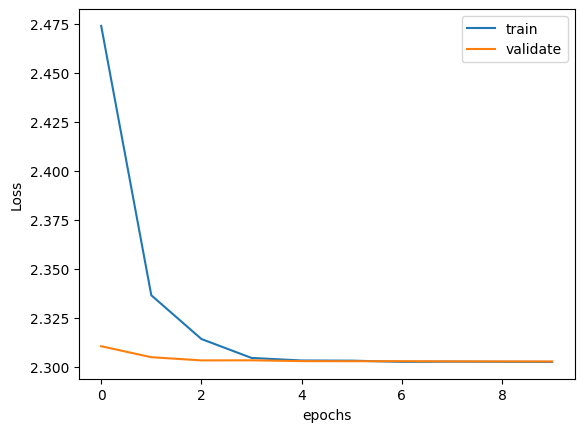

In [44]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validate')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

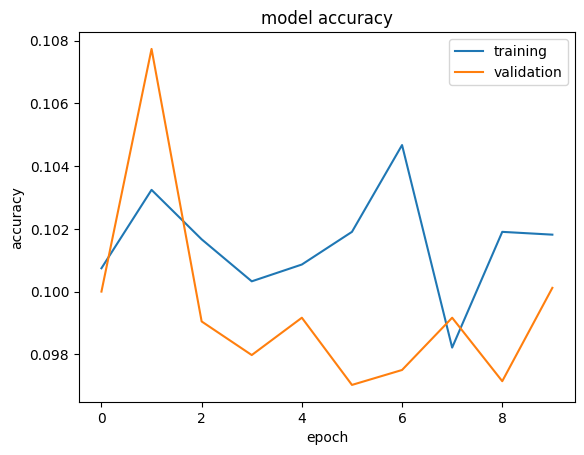

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

# Observations :-

--- For the first few epochs training loss is more, then their is a sudden drop in the training loss which then merged with the validation loss(almost a flat line).

--- Accuracy curve shows more fluctuations with more validation accuracy initially than training accuracy.
